# Bankruptcy Prediction 💸

In today's lecture we learned a lot about **machine learning methods**. Now we are going to apply our new knowlege to a real-world dataset: We are going to **predict bankruptcy**.

The data were collected from the **Taiwan** Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

The data was used in a popular paper: <a href="https://isslab.csie.ncu.edu.tw/download/publications/1.Financial%20Ratios%20and%20Corporate%20Governance%20Indicators%20in%20Bankruptcy%20Prediction-A%20Comprehensive%20Study.pdf">*Liang, D., Lu, C. C., Tsai, C. F., & Shih, G. A. (2016). Financial ratios and corporate governance indicators in bankruptcy prediction: A comprehensive study. European Journal of Operational Research, 252(2), 561-572.*</a>. Now we are going to reproduce their results.

<div style="width: 85%">
    <center>
        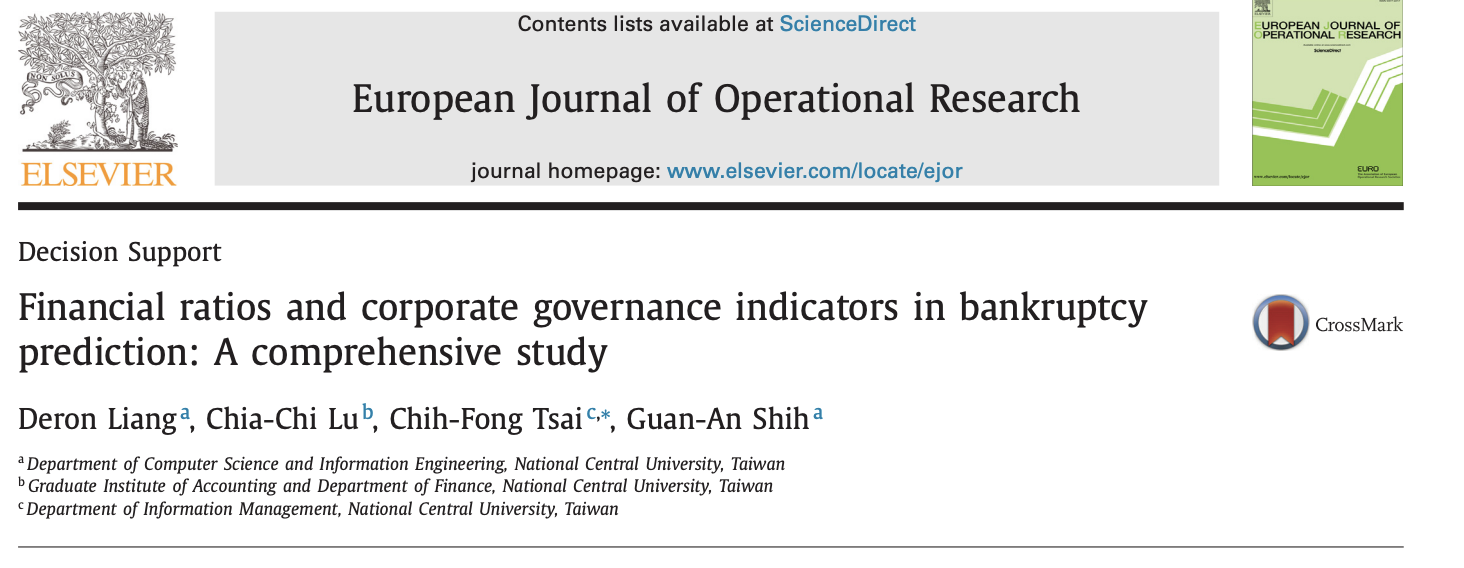
    </center>
</div>

## Exploratory Data Analysis (EDA)
Since we are going to deal with a new dataset, we first perform a small exploratory data analysis. 

1. We import our required libraries
2. We import the dataset


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Your job: Load the csv dataset from data/taiwanese-bankruptcy.csv
df = ...

In [ ]:
df.head()

In [ ]:
df.info()

Because we want to find out if a company is bankrupt or not, we want to have a look at the distribution of the bankrupt-variable in our dataset, i.e. how often a bankrupt vs. how often a company did not go bankrupt.

**Your task**: Plot the `Bankrupt?` column of the dataframe!

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Your code here

Now it is very obvious, that a lot more company do not go bankrupt in the dataset.

**Your task**: Tell me, how many companies did go bankrupt and how many did not!

In [ ]:
## Your code here

## Preprocess the Dataset

**Your task**: Find out how the dataset has been preprocessed!

**Answer**: *It should be noted that if there is a significant difference between the number of bankrupt and non-bankrupt cases, this results in a class imbalance problem, which is likely to lead to a degradation in the final prediction performance. Therefore, we use the method of stratified sampling. [...] Consequently,
the collected dataset is composed of 239 bankrupt and 239 nonbankrupt cases*.

As a first step, we **convert the pandas dataframe** into two dataframes:
* X is our array with our features
* y is our array with the target variable (Bankrupt?)

In [ ]:
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

To follow the structure of the paper, we will **sample the dataset to have the same number of bankrupt cases and financial stable cases**. In contrast to the paper, we will use a **Python library** (called **imblearn**) which implements sampling with the help of a ClusterCentroids method.

In [ ]:
# Preprocess
from imblearn.under_sampling import ClusterCentroids
from collections import Counter

print('Class distribution before under sampling:', *sorted(Counter(y).items()))

cc = ClusterCentroids(random_state=42)
X, y = cc.fit_resample(X, y)

print('Class distribution after under sampling:', *sorted(Counter(y).items()))

## Train / Test Split

Before we start to build our models, we are going to do a train/test-Split!

**Your task** <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">Read the documentation of scikit-learn</a> about how to apply a train/test-split. Use the `train_test_split` with a test-size of 15%.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = ... #Your code here

## Preprocessing

As we learned in the preprocessing lecture, there are different ways to scale features before we use them in our machine learning model.

**Your task** Read in the paper which scaler has been used. Then look into the <a href="https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling">scikit-learn documentation</a> and try to figure out how to apply the scaling from the paper on our dataset.

In [ ]:
## Your code here

scaler = MinMaxScaler()
X_train_minmax = ...
X_test_minmax = ...

## additionally a list which we are using for a tabular output later, you can ignore this line
scores = []

## Modeling
Finally, we can start to build our machine learning models!

1. Load and preprocess the data ✔
2. Choose a model
3. Train the model on the train dataset
4. Test the model on the test dataset

### Nearest Neighbor


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 2. Choose the model
nn = KNeighborsClassifier(n_neighbors=1)

# 3. Train the model on the train dataset
nn.fit(X_train_minmax, y_train)

# 4. Test the model on the test dataset
print('Score of the nearest neighbor model on the TRAINING dataset: ' + '{:.2%}'.format(nn.score(X_train_minmax, y_train)))
print('Score of the nearest neighbor model on the TEST dataset: ' + '{:.2%}'.format(nn.score(X_test_minmax, y_test)))
print('Score of the nearest neighbor model on the WHOLE, UNSAMPLED dataset: ' + '{:.2%}'.format(nn.score(scaler.transform(df.drop(['Bankrupt?'], axis=1).to_numpy()), df['Bankrupt?'].to_numpy())))

scores.append(['NN', nn.score(X_train_minmax, y_train), nn.score(X_test_minmax, y_test), nn.score(scaler.transform(df.drop(['Bankrupt?'], axis=1).to_numpy()), df['Bankrupt?'].to_numpy())])

### kNearest Neighbor

**Your task**: Look into the paper which $k$ has been chosen and apply the kNN with this parameter to our data!

In [ ]:
### Your code here

In [ ]:
### Your code here

As you know from the lecture, a Decision Tree has the big advantage that we can understand how to model works by **plotting the decision tree**.

We can do this in scikit-learn:

In [ ]:
plot_tree(dtc, feature_names=df.drop(['Bankrupt?'], axis=1).columns)

What does this tell you?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 2. Choose the model
rfc = RandomForestClassifier(random_state=42, max_depth=1)

# 3. Train the model on the train dataset
rfc.fit(X_train, y_train)

# 4. Test the model on the test dataset
print('Score of the random forest model on the TRAINING dataset: ' + '{:.2%}'.format(rfc.score(X_train, y_train)))
print('Score of the random forest neighbor model on the TEST dataset: ' + '{:.2%}'.format(rfc.score(X_test, y_test)))
print('Score of the random forest neighbor model on the WHOLE, UNSAMPLED dataset: ' + '{:.2%}'.format(rfc.score(df.drop(['Bankrupt?'], axis=1).to_numpy(), df['Bankrupt?'].to_numpy())))

scores.append(['Random Forest', rfc.score(X_train, y_train), rfc.score(X_test, y_test), rfc.score(df.drop(['Bankrupt?'], axis=1).to_numpy(), df['Bankrupt?'].to_numpy())])

In [ ]:
from sklearn.neural_network import MLPClassifier

# 2. Choose the model
mlpc = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)

# 3. Train the model on the train dataset
mlpc.fit(X_train_minmax, y_train)

# 4. Test the model on the test dataset
print('Score of the Neural Network model on the TRAINING dataset: ' + '{:.2%}'.format(mlpc.score(X_train_minmax, y_train)))
print('Score of the Neural Network model on the TEST dataset: ' + '{:.2%}'.format(mlpc.score(X_test_minmax, y_test)))
print('Score of the Neural Network model on the WHOLE, UNSAMPLED dataset: ' + '{:.2%}'.format(mlpc.score(scaler.transform(df.drop(['Bankrupt?'], axis=1).to_numpy()), df['Bankrupt?'].to_numpy())))

scores.append(['Neural Network', mlpc.score(X_train_minmax, y_train), mlpc.score(X_test_minmax, y_test), mlpc.score(scaler.transform(df.drop(['Bankrupt?'], axis=1).to_numpy()), df['Bankrupt?'].to_numpy())])

# Literature
* <a href="https://isslab.csie.ncu.edu.tw/download/publications/1.Financial%20Ratios%20and%20Corporate%20Governance%20Indicators%20in%20Bankruptcy%20Prediction-A%20Comprehensive%20Study.pdf">Liang, D., Lu, C. C., Tsai, C. F., & Shih, G. A. (2016). Financial ratios and corporate governance indicators in bankruptcy prediction: A comprehensive study. European Journal of Operational Research, 252(2), 561-572.</a>